### **Importing Libraries**


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

### **Loading DataSet**

In [3]:
data_url = "./Dataset/Cit-HepPh.txt"
df_data_1 = pd.read_csv(data_url, sep='\t', skiprows=4, names=['FromNodeId', 'ToNodeId'], dtype={'FromNodeId': int, 'ToNodeId': int})

### **Loading Time of Release**

In [7]:
data_url = "./Dataset/cit-HepPh-dates.txt"
df_data_2 = pd.read_csv(data_url, sep='\t', skiprows=1, names=['NodeId', 'Date'], dtype={'NodeId': str, 'Date': str})
df_data_2['Date'] = pd.to_datetime(df_data_2['Date'])
graphs_by_date = {}
# Filter entries with '11' at the beginning of the 'NodeId' column
df_data_2 = df_data_2[~df_data_2['NodeId'].str.startswith('11')]
# Filter entries with leading 0's of the 'NodeId' column
df_data_2['NodeId'] = df_data_2['NodeId'].astype(str).str.lstrip('0')
df_data_2['NodeId'] = df_data_2['NodeId'].astype(int)
# i = 0
# unnodes = df_data_2['NodeId']
# for nodes in unnodes:
#     i += 1
# print(i)


32651


### **Merging Both DataSet**

In [9]:
df_merged = pd.merge(df_data_1, df_data_2, how='inner', left_on='FromNodeId', right_on='NodeId')
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
# Filter out rows where 'ToNodeId' is not present in 'NodeId' column of df_data_2
df_merged = df_merged[df_merged['ToNodeId'].isin(df_data_2['NodeId'])]
# unnodes = df_merged['FromNodeId'].unique()
# i = 0
# for nodes in unnodes:
#     i += 1
# print(i)

### **Creation of Graph**

In [12]:

# Construct the directed graph
G_lat = nx.from_pandas_edgelist(df_merged, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

print("Number of nodes:", len(G_lat.nodes()))
print("Number of edges:", len(G_lat.edges()))
print(nx.density(G_lat))


Number of nodes: 30501
Number of edges: 347268
0.0003732938613676198


### **Yearly Analysis**

In [13]:
df_merged['Year'] = df_merged['Date'].dt.year
density_by_year = {}
deg_cen_by_year = {}
bet_cen_by_year = {}
pag_cen_by_year = {}
dia_by_year = {}
grouped = df_merged.groupby('Year')

for year, group in grouped:
    filtered_data = df_merged[df_merged['Year'] <= year]
    G = nx.from_pandas_edgelist(filtered_data, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

    density = nx.density(G)
    deg_cen = nx.degree_centrality(G)
    bet_cen = nx.betweenness_centrality(G)
    pag_cen = nx.pagerank(G)
    # dia = nx.diameter(G)
    print(density)

    density_by_year[year] = density
    deg_cen_by_year[year] = deg_cen
    bet_cen_by_year[year] = bet_cen
    pag_cen_by_year[year] = pag_cen
    # dia_by_year[year] = dia

0.004587651122625216
0.0012522519506892535
0.0007614148035924327
0.0006344934194734903
0.0005721215654973133
0.0005192150246573317
0.00046169052234757265
0.00043087620694911275
0.00038751107400653625
0.00037525267902149335
0.0003732938613676198


### **Density**

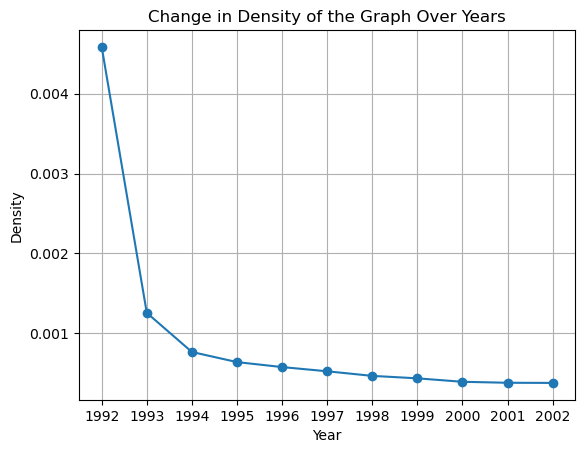

In [22]:
years = list(density_by_year.keys())
densities = list(density_by_year.values())

plt.plot(years, densities, marker='o')
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Change in Density of the Graph Over Years')
plt.xticks(years)
plt.grid(True)
plt.show()
# plt.savefig("Density.png")

### **Degree Centrality**

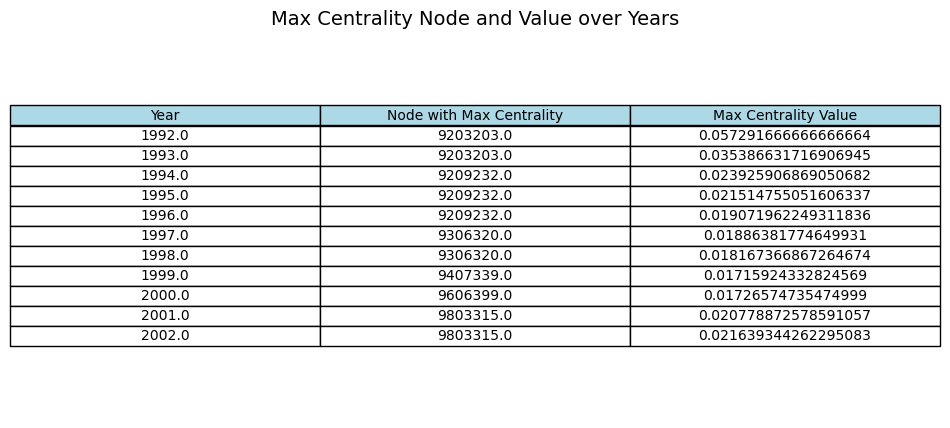

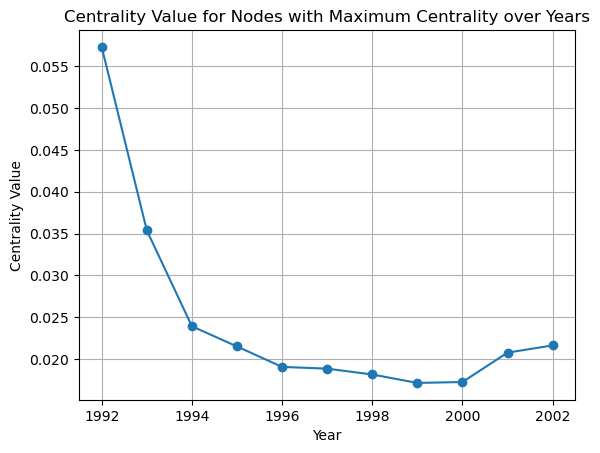

In [21]:
years = list(deg_cen_by_year.keys())

max_centrality_nodes = []
max_centrality_values = []

for year in years:
    centrality_scores = deg_cen_by_year[year]
    max_node = max(centrality_scores, key=lambda k: centrality_scores[k])
    max_centrality_nodes.append(max_node)
    max_centrality_values.append(centrality_scores[max_node])

df = pd.DataFrame({'Year': years,
                   'Node with Max Centrality': max_centrality_nodes,
                   'Max Centrality Value': max_centrality_values})

plt.figure(figsize=(10, 5))
table = plt.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['lightblue']*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.axis('off')
plt.title('Max Centrality Node and Value over Years', fontsize=14)
plt.show()
# plt.savefig("Plot_1_deg.png")
# plt.clf()

plt.plot(years, max_centrality_values, marker='o')
plt.xlabel('Year')
plt.ylabel('Centrality Value')
plt.title('Centrality Value for Nodes with Maximum Centrality over Years')
plt.grid(True)
plt.show()
# plt.savefig("Plot_2_deg.png")


### **Betweenness Centrality**

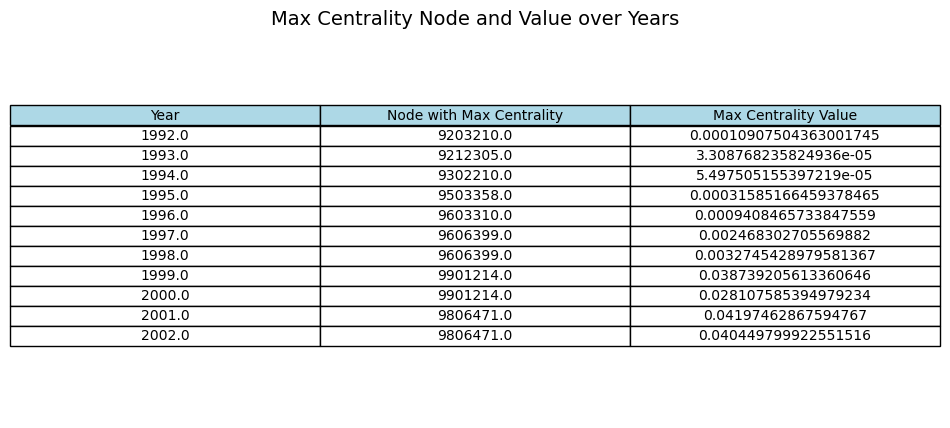

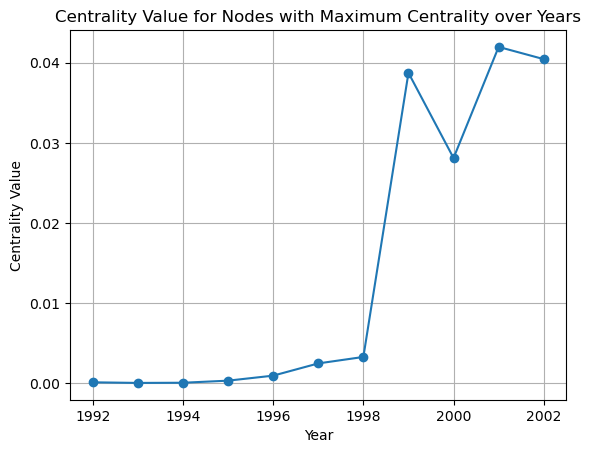

In [20]:
years = list(bet_cen_by_year.keys())

max_centrality_nodes = []
max_centrality_values = []

for year in years:
    centrality_scores = bet_cen_by_year[year]
    max_node = max(centrality_scores, key=lambda k: centrality_scores[k])
    max_centrality_nodes.append(max_node)
    max_centrality_values.append(centrality_scores[max_node])

df = pd.DataFrame({'Year': years,
                   'Node with Max Centrality': max_centrality_nodes,
                   'Max Centrality Value': max_centrality_values})

plt.figure(figsize=(10, 5))
table = plt.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['lightblue']*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.axis('off')
plt.title('Max Centrality Node and Value over Years', fontsize=14)
plt.show()
# plt.savefig("Plot_1_bet.png")
# plt.clf()

plt.plot(years, max_centrality_values, marker='o')
plt.xlabel('Year')
plt.ylabel('Centrality Value')
plt.title('Centrality Value for Nodes with Maximum Centrality over Years')
plt.grid(True)
plt.show()
# plt.savefig("Plot_2_bet.png")



### **PageRank Centrality**

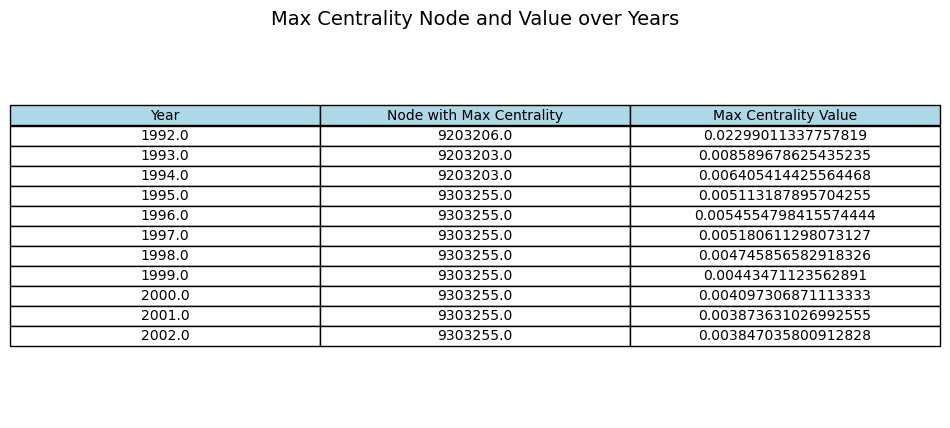

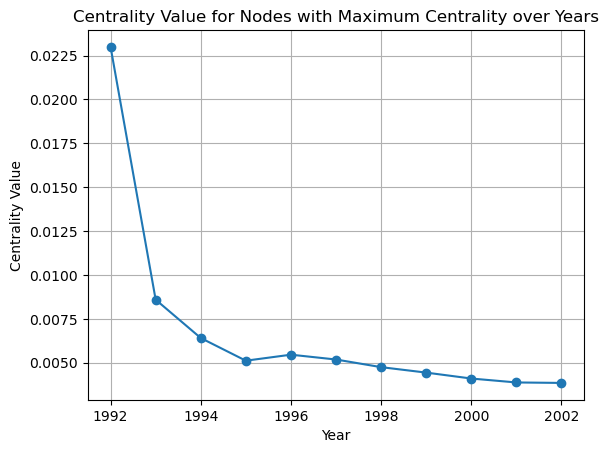

In [19]:
years = list(pag_cen_by_year.keys())

max_centrality_nodes = []
max_centrality_values = []

for year in years:
    centrality_scores = pag_cen_by_year[year]
    max_node = max(centrality_scores, key=lambda k: centrality_scores[k])
    max_centrality_nodes.append(max_node)
    max_centrality_values.append(centrality_scores[max_node])

df = pd.DataFrame({'Year': years,
                   'Node with Max Centrality': max_centrality_nodes,
                   'Max Centrality Value': max_centrality_values})

plt.figure(figsize=(10, 5))
table = plt.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['lightblue']*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.axis('off')
plt.title('Max Centrality Node and Value over Years', fontsize=14)
plt.show()
# plt.savefig("Plot_1_pag.png")
# plt.clf()

plt.plot(years, max_centrality_values, marker='o')
plt.xlabel('Year')
plt.ylabel('Centrality Value')
plt.title('Centrality Value for Nodes with Maximum Centrality over Years')
plt.grid(True)
plt.show()
# plt.savefig("Plot_2_pag.png")

### **Average Out Degree Analysis**

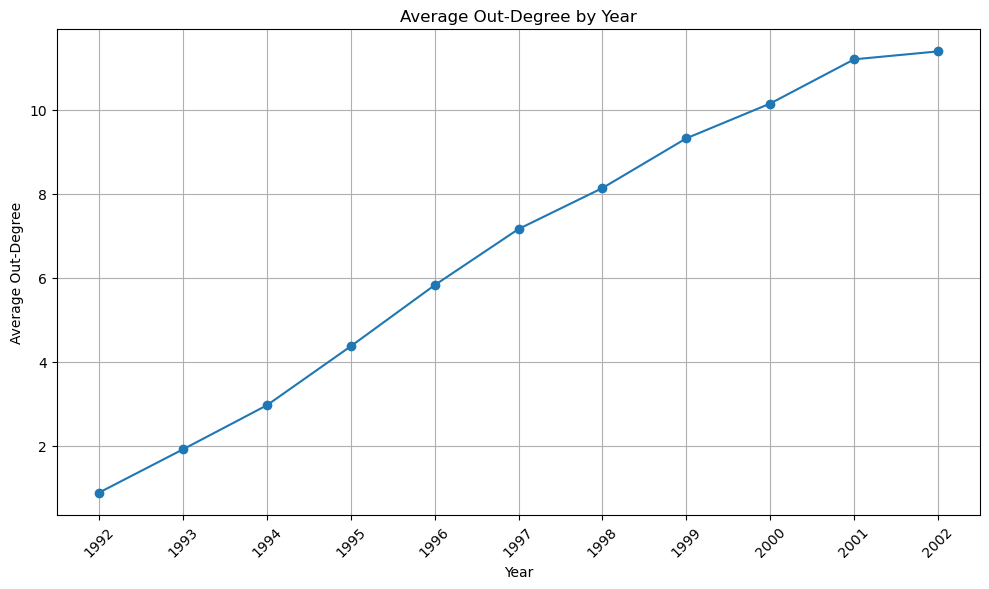

In [23]:
df_merged['Year'] = df_merged['Date'].dt.year
avg_out_degree_by_year = {}

grouped = df_merged.groupby('Year')

for year, group in grouped:
    filtered_data = df_merged[df_merged['Year'] <= year]

    G = nx.from_pandas_edgelist(filtered_data, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

    out_degrees = dict(G.out_degree())
    avg_out_degree = sum(out_degrees.values()) / len(out_degrees)

    avg_out_degree_by_year[year] = avg_out_degree

years = list(avg_out_degree_by_year.keys())
avg_out_degrees = list(avg_out_degree_by_year.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, avg_out_degrees, marker='o', linestyle='-')
plt.title('Average Out-Degree by Year')
plt.xlabel('Year')
plt.ylabel('Average Out-Degree')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()
# plt.savefig("AvgOutDeg.png")

### **Densification Law**

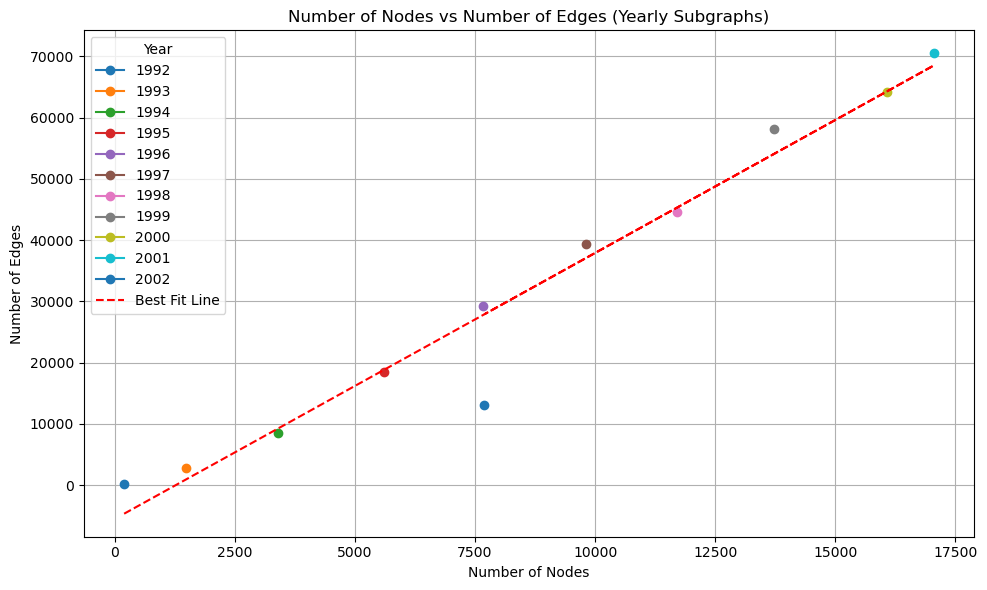

Densification Exponent is a = 4.340405412821247


In [26]:
df_merged['Year'] = df_merged['Date'].dt.year
nodes_edges_by_year = {}

grouped = df_merged.groupby('Year')

for year, group in grouped:
    filtered_data = df_merged[df_merged['Year'] == year]

    G_year = nx.from_pandas_edgelist(filtered_data, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

    num_nodes = G_year.number_of_nodes()
    num_edges = G_year.number_of_edges()

    nodes_edges_by_year[year] = (num_nodes, num_edges)

x_values = []
y_values = []

for year, (num_nodes, num_edges) in nodes_edges_by_year.items():
    x_values.append(num_nodes)
    y_values.append(num_edges)

x_values = np.array(x_values).reshape(-1, 1)
y_values = np.array(y_values)

regressor = LinearRegression()
regressor.fit(x_values, y_values)
y_pred = regressor.predict(x_values)

plt.figure(figsize=(10, 6))
for year, (num_nodes, num_edges) in nodes_edges_by_year.items():
    plt.plot(num_nodes, num_edges, marker='o', linestyle='-', label=str(year))

plt.plot(x_values, y_pred, color='red', linestyle='--', label='Best Fit Line')
plt.title('Number of Nodes vs Number of Edges (Yearly Subgraphs)')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Edges')
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()
# plt.savefig("Densification.png")

slope = regressor.coef_[0]
print("Densification Exponent is a =", slope)